In [2]:
import pymn
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
import numpy as np

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/trainModel.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/trainModel.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?


In [3]:
norm_data = sc.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Maize_Sorghum_Setaria_Nuclei_Cells_SCT_OrthologousgenesGoodname06Filtered@assays$RNA@data.csv')
norm_data = norm_data.T

In [4]:
cell_identity = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Cell_replicate_name_Maize_Sorghum_Setaria_Nuclei_Cells_SCT_OrthologousgenesGoodname06Filtered (1).csv',index_col = 0)
cell_identity

,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,integrated_snn_res.0.6,seurat_clusters,Species,Cells_Nuclei,Species_Type,Annotation,CellNames
Maize_Cell1_AAACCTGAGAGCTTCT,Maize_Cell_1,7907,3206,13415,3313,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AAACCTGAGAGCTTCT
Maize_Cell1_AAAGCAAAGAACTGTA,Maize_Cell_1,8702,3189,13712,3231,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AAAGCAAAGAACTGTA
Maize_Cell1_AAATGCCAGTAGCCGA,Maize_Cell_1,13018,4202,14150,4202,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AAATGCCAGTAGCCGA
Maize_Cell1_AAATGCCCAATCTACG,Maize_Cell_1,12346,3915,13974,3913,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AAATGCCCAATCTACG
Maize_Cell1_AACTGGTAGTGACTCT,Maize_Cell_1,6317,2726,13679,3038,1,1,Maize,Cell,Maize_Cell,Cortex_3,Maize_Cell1_AACTGGTAGTGACTCT
...,...,...,...,...,...,...,...,...,...,...,...,...
Set_Nuclei_2_TCACATTCAAGACGAC-1,Set_Nuclei_2,2585,1560,2583,1558,10,10,Setaria,Nuclei,Setaria_Nuclei,Columella,Set_Nuclei_2_TCACATTCAAGACGAC-1
Set_Nuclei_2_TCACGGGTCTTTCAGT-1,Set_Nuclei_2,2639,1549,2639,1549,10,10,Setaria,Nuclei,Setaria_Nuclei,Columella,Set_Nuclei_2_TCACGGGTCTTTCAGT-1
Set_Nuclei_2_TCGAACACAGTTGAAA-1,Set_Nuclei_2,2516,1547,2516,1547,10,10,Setaria,Nuclei,Setaria_Nuclei,Columella,Set_Nuclei_2_TCGAACACAGTTGAAA-1
Set_Nuclei_2_TCGTCCACACTGCGTG-1,Set_Nuclei_2,2570,1540,2569,1539,10,10,Setaria,Nuclei,Setaria_Nuclei,Columella,Set_Nuclei_2_TCGTCCACACTGCGTG-1


In [5]:
norm_data.obs['Cell Cluster Annotation'] = cell_identity['Annotation']
norm_data.obs['Species'] = 'unassigned'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Maize')] = 'Maize'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Set')] = 'Millet'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Sorg')] = 'Sorghum'


In [6]:
norm_data.obs['Cluster and Type'] = norm_data.obs['Cell Cluster Annotation']
norm_data.obs['Cluster and Type'].loc[norm_data.obs_names.str.contains('Nucl')] = norm_data.obs['Cluster and Type'] + ' Nucl'
norm_data.obs['Cluster and Type'].loc[norm_data.obs_names.str.contains('Cell')] = norm_data.obs['Cluster and Type'] + ' Cell'

In [7]:
norm_data.obs['Cluster and Species'] = norm_data.obs['Cell Cluster Annotation']
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Maize')] = norm_data.obs['Cluster and Type'] + ' Maize'
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Millet')] = norm_data.obs['Cluster and Type'] + ' Millet'
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Sorghum')] = norm_data.obs['Cluster and Type'] + ' Sorghum'

In [8]:
norm_data.obs['Type'] = np.nan
norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Nucl')] = 'Nucl'
norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Cell')] = 'Cell'
norm_data.obs

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type
Maize_Cell1_AAACCTGAGAGCTTCT,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell
Maize_Cell1_AAAGCAAAGAACTGTA,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell
Maize_Cell1_AAATGCCAGTAGCCGA,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell
Maize_Cell1_AAATGCCCAATCTACG,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell
Maize_Cell1_AACTGGTAGTGACTCT,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Cell Maize,Cell
...,...,...,...,...,...
Set_Nuclei_2_TCACATTCAAGACGAC-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl
Set_Nuclei_2_TCACGGGTCTTTCAGT-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl
Set_Nuclei_2_TCGAACACAGTTGAAA-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl
Set_Nuclei_2_TCGTCCACACTGCGTG-1,Columella,Millet,Columella Nucl,Columella Nucl Millet,Nucl


In [9]:
norm_data.obs['Type and Species'] = norm_data.obs['Species'] + ' '+  norm_data.obs['Type']

In [10]:
maize_genome_1 = norm_data.copy()

In [11]:
all_other_plants = norm_data[norm_data.obs['Species']!= 'Maize']

In [12]:
maize_genome_1 = maize_genome_1[maize_genome_1.obs['Species'] == 'Maize']

In [13]:
maize_genome_1

View of AnnData object with n_obs × n_vars = 6903 × 56381
    obs: 'Cell Cluster Annotation', 'Species', 'Cluster and Type', 'Cluster and Species', 'Type', 'Type and Species'

In [14]:
sorghum_gene_name_mapper = pd.read_csv(
    '/data/CoCoCoNet/geneInfo/sorghum_info.csv')
sorghum_gene_name_mapper['LocusTag'] = sorghum_gene_name_mapper[
    'LocusTag'].str.replace('_', '-')
sorghum_gene_name_mapper.head(5)

,EntrezID,EnsemblID,GeneSymbol,LocusTag,Synonyms,dbXrefs,Chromosome,Type,UniProtID,UniProtID2,OrthoID,NetworkIDs
0,8081570.0,NaN,LOC8081570,SORBI-3001G000100,NaN,|NA|,1,protein-coding,NaN,NaN,NaN,LOC8081570
1,8059226.0,SORBI_3001G000200,LOC8059226,SORBI-3001G000200,NaN,|NA|,1,protein-coding,C5WR13,NaN,4558_0:0004e6,LOC8059226
2,110434520.0,NaN,LOC110434520,NaN,NaN,|NA|,1,ncRNA,NaN,NaN,NaN,LOC110434520
3,8059546.0,NaN,LOC8059546,SORBI-3001G000400,NaN,|NA|,1,protein-coding,NaN,NaN,NaN,LOC8059546
4,8059547.0,NaN,LOC8059547,SORBI-3001G000700,NaN,|NA|,1,protein-coding,NaN,NaN,NaN,LOC8059547


In [15]:
long_form_cross_species = pd.read_csv(
    '/data/passala/Collaborator_Data/Bruno_Ken_Collab/Orthologous_Genes_Sorgum_M1_M2_Set.csv'
)
gene_mapping_triplets = long_form_cross_species.pivot(index='Triplet',
                                                      columns='Species',
                                                      values='Genes')
gene_mapping_triplets.rename(columns={'S': 'LocusTag'}, inplace=True)

In [16]:
gene_mapping_triplets

Species,M1,M2,LocusTag,Set
Triplet,,,,
1,Zm00001d001766,Zm00001d026665,SORBI-3006G274700,Sevir.3G009000.v2.1
2,Zm00001d001772,Zm00001d026662,SORBI-3006G274300,Sevir.3G009500.v2.1
3,Zm00001d001774,Zm00001d026657,SORBI-3006G273800,Sevir.3G010300.v2.1
4,Zm00001d001780,Zm00001d026653,SORBI-3006G273200,Sevir.3G010800.v2.1
5,Zm00001d001784,Zm00001d026652,SORBI-3006G273000,Sevir.3G011200.v2.1
...,...,...,...,...
5048,Zm00001d053173,Zm00001d004856,SORBI-3005G046900,Sevir.8G042200.v2.1
5049,Zm00001d053177,Zm00001d004855,SORBI-3005G047100,Sevir.8G042300.v2.1
5050,Zm00001d053178,Zm00001d004851,SORBI-3005G047200,Sevir.8G042400.v2.1


In [17]:
sorg_triplets_none_missing = gene_mapping_triplets.dropna()
sorg_triplets_none_missing['Set'] = sorg_triplets_none_missing['Set'].str.replace('.v2.1','')
sorg_triplets_none_missing

<ipython-input-17-b10e211b757b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sorg_triplets_none_missing['Set'] = sorg_triplets_none_missing['Set'].str.replace('.v2.1','')
<ipython-input-17-b10e211b757b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorg_triplets_none_missing['Set'] = sorg_triplets_none_missing['Set'].str.replace('.v2.1','')


Species,M1,M2,LocusTag,Set
Triplet,,,,
1,Zm00001d001766,Zm00001d026665,SORBI-3006G274700,Sevir.3G009000
2,Zm00001d001772,Zm00001d026662,SORBI-3006G274300,Sevir.3G009500
3,Zm00001d001774,Zm00001d026657,SORBI-3006G273800,Sevir.3G010300
4,Zm00001d001780,Zm00001d026653,SORBI-3006G273200,Sevir.3G010800
5,Zm00001d001784,Zm00001d026652,SORBI-3006G273000,Sevir.3G011200
...,...,...,...,...
5048,Zm00001d053173,Zm00001d004856,SORBI-3005G046900,Sevir.8G042200
5049,Zm00001d053177,Zm00001d004855,SORBI-3005G047100,Sevir.8G042300
5050,Zm00001d053178,Zm00001d004851,SORBI-3005G047200,Sevir.8G042400


In [18]:
maize_genome_1.var_names

Index(['Zm00001d027230', 'Zm00001d027231', 'Zm00001d027236', 'Zm00001d027239',
       'Zm00001d027240', 'Zm00001d027242', 'Zm00001d027250', 'Zm00001d027256',
       'Zm00001d027257', 'Zm00001d027258',
       ...
       'Sevir.9G473100', 'Sevir.9G489600', 'Sevir.9G509500', 'Sevir.9G512300',
       'Sevir.9G513900', 'Sevir.9G535000', 'Sevir.9G535700', 'Sevir.J008600',
       'Sevir.J014800', 'Sevir.J016200'],
      dtype='object', length=56381)

In [19]:
maize_genome_1[:,maize_genome_1.var.index.isin([sorg_triplets_none_missing['M1'].to_list()])]

View of AnnData object with n_obs × n_vars = 6903 × 0
    obs: 'Cell Cluster Annotation', 'Species', 'Cluster and Type', 'Cluster and Species', 'Type', 'Type and Species'

In [20]:
maize_genome_1.var['M1 Gene Set'] = False
maize_genome_1.var['M2 Gene Set'] = False
maize_genome_1.var['Triplet Set'] = False
maize_genome_1.var

Trying to set attribute `.var` of view, copying.


,M1 Gene Set,M2 Gene Set,Triplet Set
Zm00001d027230,False,False,False
Zm00001d027231,False,False,False
Zm00001d027236,False,False,False
Zm00001d027239,False,False,False
Zm00001d027240,False,False,False
...,...,...,...
Sevir.9G535000,False,False,False
Sevir.9G535700,False,False,False
Sevir.J008600,False,False,False
Sevir.J014800,False,False,False


In [21]:
list_of_triplet_genes = sorg_triplets_none_missing['M1'].to_list() + sorg_triplets_none_missing['Set'].to_list() + sorg_triplets_none_missing['LocusTag'].to_list() + sorg_triplets_none_missing['M2'].to_list()

In [22]:
len(list_of_triplet_genes)

19104

In [23]:
maize_genome_1.var['M1 Gene Set'].loc[maize_genome_1.var.index.isin(sorg_triplets_none_missing['M1'])] = True
maize_genome_1.var['M2 Gene Set'].loc[maize_genome_1.var.index.isin(sorg_triplets_none_missing['M2'])] = True
maize_genome_1.var['Triplet Set'].loc[maize_genome_1.var.index.isin(list_of_triplet_genes)] = True

In [24]:
maize_genome_1 = maize_genome_1[:,maize_genome_1.var['Triplet Set'] == True]

In [25]:
all_other_plants.var['Triplet Set'] = False
all_other_plants.var['Triplet Set'].loc[all_other_plants.var.index.isin(list_of_triplet_genes)] = True
all_other_plants = all_other_plants[:,all_other_plants.var['Triplet Set'] == True]

Trying to set attribute `.var` of view, copying.


In [26]:
maize_genome_2 = maize_genome_1.copy()

In [27]:
maize_genome_1[:,maize_genome_1.var['M2 Gene Set']== True].X = 0 

In [28]:
maize_genome_2[:,maize_genome_2.var['M1 Gene Set']== True].X = 0

In [29]:
maize_genome_1.obs['Species'] = 'Maize Genome 1'
maize_genome_2.obs['Species'] = 'Maize Genome 2'


Trying to set attribute `.obs` of view, copying.


In [30]:
full_set_of_fake_species = ad.concat([maize_genome_1,maize_genome_2,all_other_plants])

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [31]:
full_set_of_fake_species.obs_names_make_unique()

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


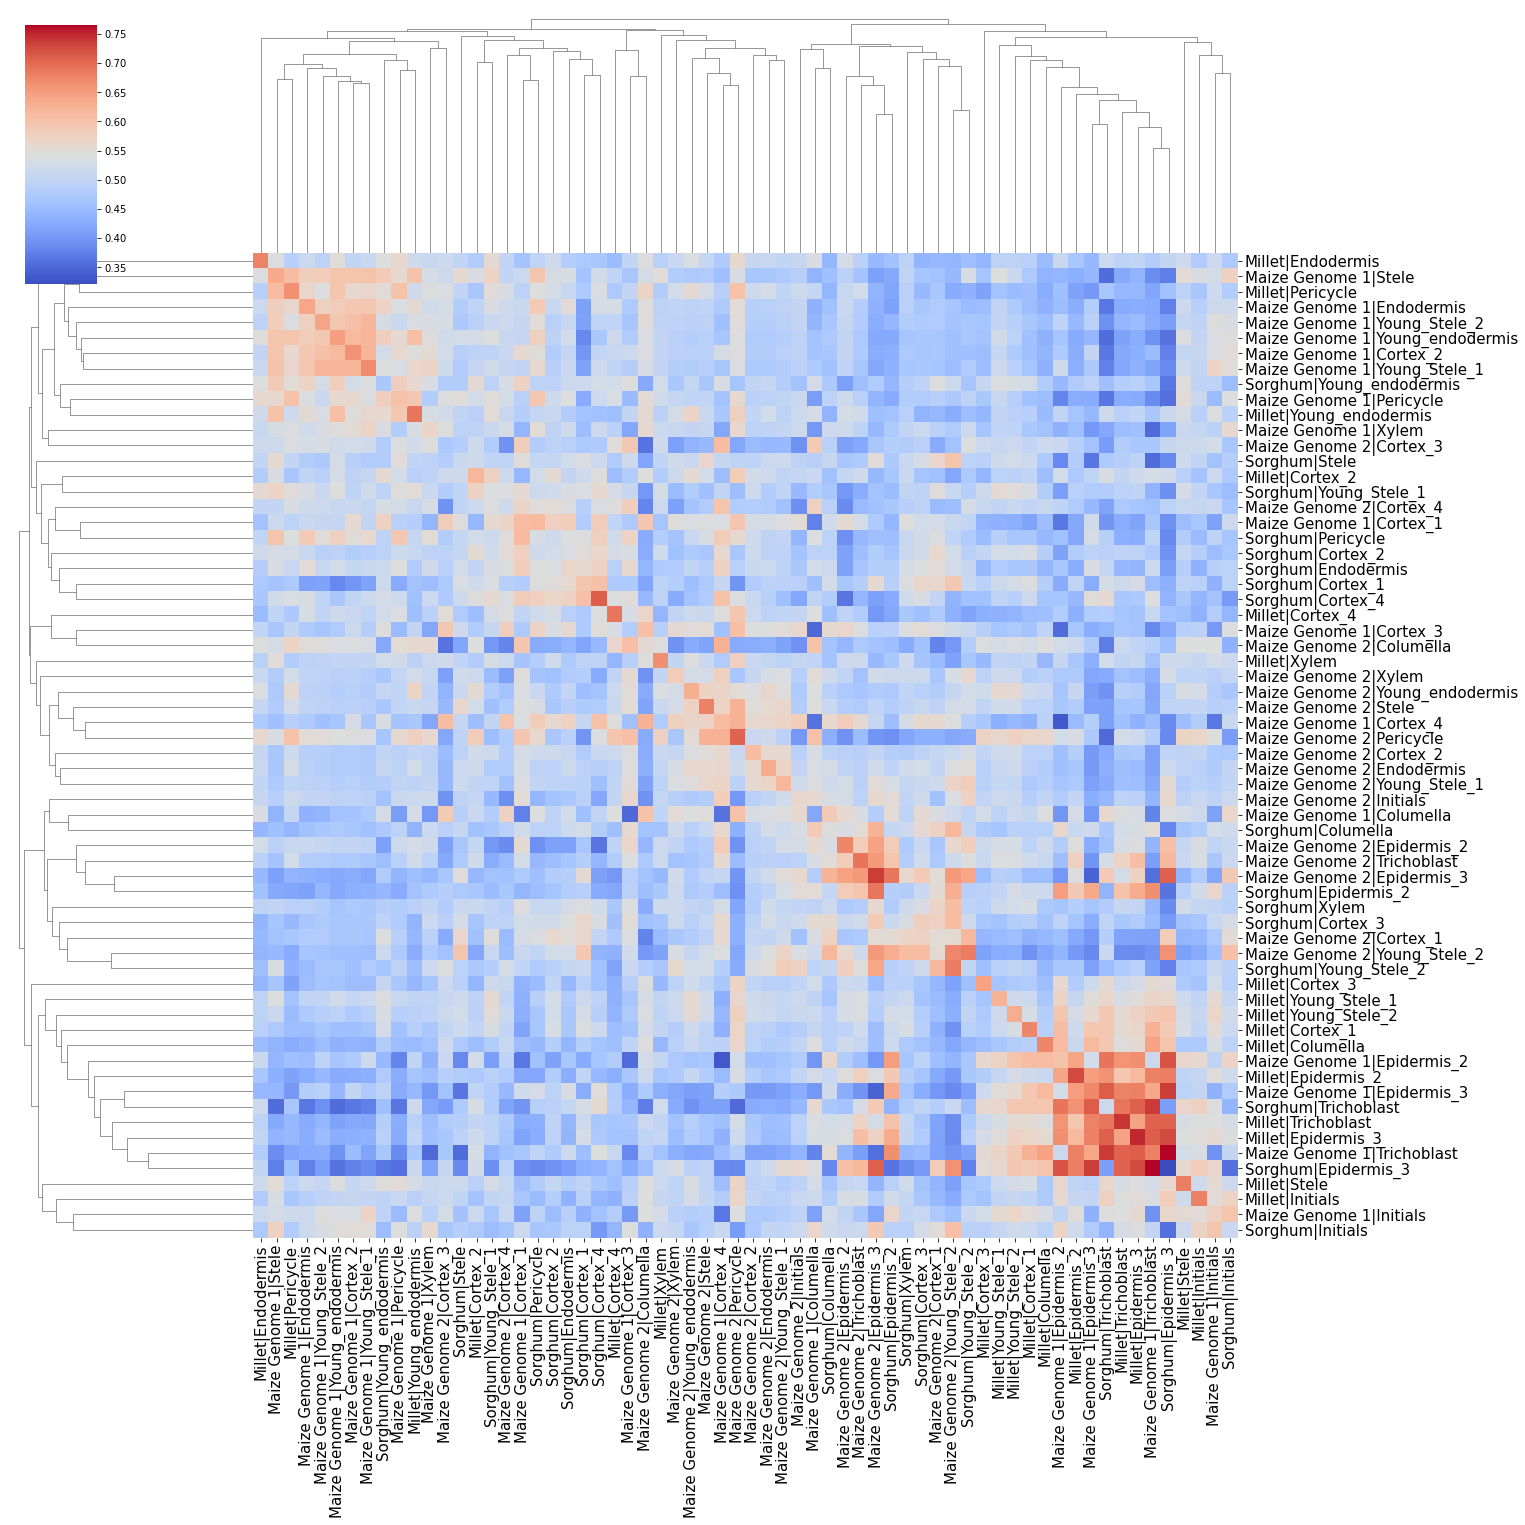

In [32]:
pymn.variableGenes(full_set_of_fake_species,study_col = 'Species')
pymn.MetaNeighborUS(full_set_of_fake_species,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(full_set_of_fake_species,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False)
#g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/new_data_only_across_species.jpg')

In [33]:
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/seperated_maize_into_two_sub_genomes_and_limited_the_genes.jpg')

In [34]:
full_set_of_fake_species.uns['MetaNeighborUS'].to_csv('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Stuff_to_send_bruno/maize_genomes_seperate.csv')

In [35]:
norm_data.var['Triplet Set'] = False
norm_data.var['Triplet Set'].loc[norm_data.var.index.isin(list_of_triplet_genes)] = True
norm_data = norm_data[:,norm_data.var['Triplet Set'] == True]

Trying to set attribute `.var` of view, copying.
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


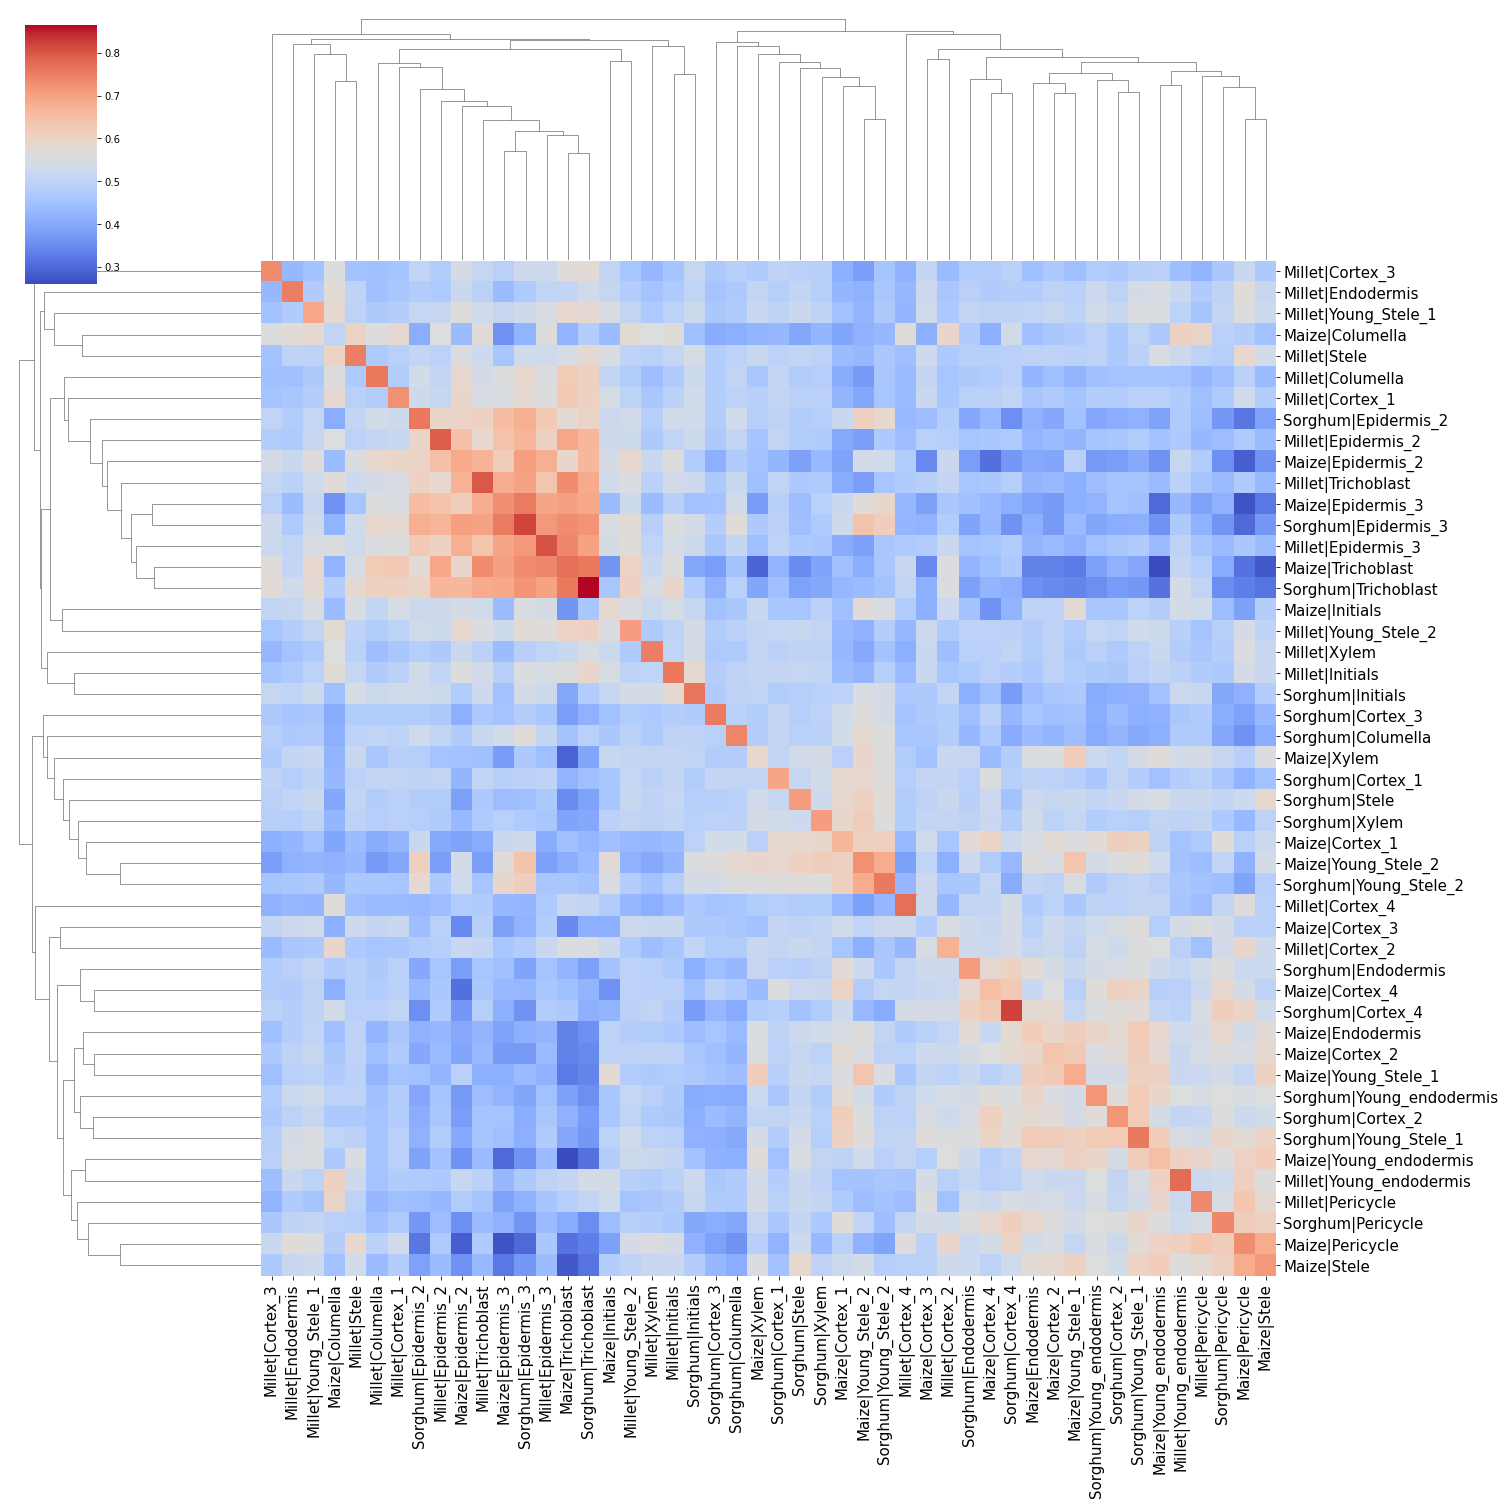

In [38]:
pymn.variableGenes(norm_data,study_col = 'Species')
pymn.MetaNeighborUS(norm_data,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(norm_data,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False)
#g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/new_data_only_across_species.jpg')

In [39]:
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/retained_genes_without_splitting_data.jpg')